# Fixed-point iteration

#### Definition

A function $g(x)$ has a fixed point at $x = p$ if $p = g(p)$.<br><br>




* This is called a fixed point because $g(g(p)) = g(p) = p$, or more generally $g^{(k)}(p) = p$ (the $k$th composition of $g$ with itself).

* If $g(x)$ has a fixed point at $x = p$ then $f(x) = x-g(x)$ has a root at $x = p$.


* If $f(x)$ has a zero at $x = p$ then the function $g(x) = x - f(x)$ has a fixed point at $x = p$.

#### Example

Find the fixed point(s) of $g(x) = 1 + \sqrt{x}$, $x \geq 0$.

# Existence and uniqueness of fixed points
#### Theorem 1

1. If $g \in C[a,b]$ and $g(x) \in [a,b]$ for all $x \in [a,b]$, then $g$ has at least one fixed point. 
2. If, in addition, $g'(x)$ exists on $(a,b)$ and there is a positive constant $K < 1$ with
$$ |g'(x)| \leq K, \quad \text{for all} \quad x \in (a,b),$$
then there is exactly one fixed point in $[a,b]$.  

#### Proof

__Part 1__: Let $f(x) = x - g(x)$.  Then $f(a) = a - g(a) \leq 0$ because $g(a) \in [a,b]$ or $g(a) \geq a$.  Also, $f(b) = b - g(b) \geq 0$ because $g(b) \in [a,b]$ or $g(b) \leq b$.  Then because $f(x)$ is continuous, the Intermediate Value Theorem guarantees that there is one root of $f$ in $[a,b]$ and therefore $g$ has a fixed point in $[a,b]$

__Part 2__ By Part 1, we know that $g(x)$ has at least one fixed point $p \in [a,b]$.  Let us assume there is another fixed point $p^* \in [a,b]$, $p^* \neq p$.  Then $f(x) = x - g(x)$ has two roots in $[a,b]$.  Recall, Rolle's Theorem. It states that $f'(c) = 0$ for some point $c$ that lies between $p$ and $p^*$:

$$ 0 = f'(c) = 1 - g'(c) \Longrightarrow g'(c) = 1.$$

This violates our assumptions and $p^*$ cannot exist.

#### Example

Using this theorem, show that $g(x) = 1 + \sqrt{x}$ has one and only one fixed point on $[1,4]$.

### This theorem gives a sufficient condition for a unique fixed point to exist.  It does not give a necessary condition. 

Consider

$$g(x) = e^{-x}, \quad x \in [0,1].$$

Because $g$ is decreasing, $g(0) = 1 \in [0,1]$, and $g(1) > 0$ we are guaranteed a fixed point on $[0,1]$.  To apply the theorem we look at $g'(x) = - e^{-x}$.

On the interval $[0,1]$, $|g'(x)| \leq 1$ and it attains the value one at $x = 0$.  We cannot apply the theorem (need a strict inequality) to state uniqueness of the fixed point.

But if we plot $g(x)$ and the function $h(x) = x$, it is clear that they cross only once.

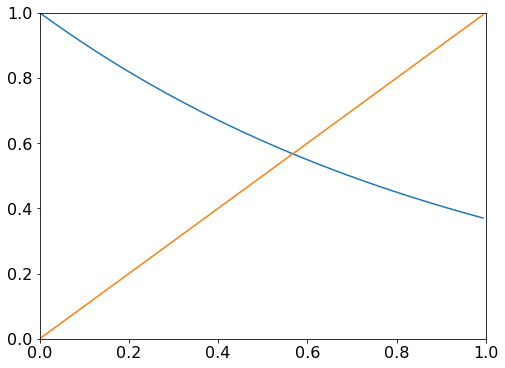

In [1]:
from draw import graph_two_functions
import numpy as np 
f1 = lambda x: np.exp(-x)
f2 = lambda x: x
graph_two_functions(f1, f2, x1=0, y1=0)

#### Definition

Suppose that $g(x)$ has a unique fixed point on the interval $[a,b]$.  Given $p_0 \in [a,b]$ (an initial guess), define $p_n = g(p_{n-1})$ for $n \geq 1$.

<br>

If the sequence $p_n \to p$ as $n \to \infty$, and if $g$ is continuous

$$ p = \lim_{n\to\infty} p_n = \lim_{n \to \infty} g(p_{n-1}) = g \left( \lim_{n \to \infty} p_{n-1} \right) = g(p).$$

The technique of constructing the sequence $\{g_n\}_{n = 1}^\infty$ is called __fixed-point iteration__.  

#### Example

Use fixed-point iteration to find the fixed point(s) of $g(x) = 1 + \sqrt{x}$, $x \geq 0$.

In [2]:
from fixed_point_iteration_helper import print_heading, print_row
import numpy as np 

def fixed_point_iteration(func, p0, n_max):
    print_heading()     
    p = p0
    for n in range(n_max):
        print_row(p, func(p))
        p = func(p)
    return p

g = lambda x: 1 + np.sqrt(x)
p_approx = fixed_point_iteration(g, p0=0.1, n_max=10)
p_exact = ((1 + np.sqrt(5))/2)**2
print('difference between approximate and exact fixed points = ', abs(p_approx - p_exact))

p_n		 g(p_n)
0.100000	 1.316228	
1.316228	 2.147270	
2.147270	 2.465357	
2.465357	 2.570145	
2.570145	 2.603167	
2.603167	 2.613433	
2.613433	 2.616612	
2.616612	 2.617594	
2.617594	 2.617898	
2.617898	 2.617992	
difference between approximate and exact fixed points =  4.19776218132e-05


### Convergence of fixed point iteration

When does fixed point iteration converge, and at what rate?

#### Theorem 2

Let $g \in C[a,b]$ be such that $g(x) \in [a,b]$ for all $x \in [a,b]$.  Suppose, in addition, that $g'$ exists on $(a,b)$ and there exists $0 \leq K < 1 $ such that

$$ |g'(x)| \leq K, \quad \text{ for all } ~~ x \in [a,b]. $$

Then for any number $p_0 \in [a,b]$, the sequence $p_n \to p$ at rate $K^n$ where $p$ is the unique fixed point in $[a,b]$. 

#### Proof

From Theorem 1, we know that the unique fixed point $p$ exists.  Then

$$ |p_n - p| = |g(p_{n-1}) - g(p)| \leq K|p_{n-1} - p| \leq K^2 |p_{n-2} - p| \leq K^n |p_0 - p|. $$

It also follows that $|p_0 - p| \leq b-a$, the length of the interval that contains them both.  And so

$$|p_n - p| \leq K^n (b-a), \quad \text{or} \quad p_n = p + O(K^n),$$

as $n \to \infty$.  Convergence follows because $K < 1$.

## Example 
Use fixed-point iteration to find the root of $f(x) = x^4 + 2x^2 -x - 3$. 

In [3]:
# Method 1: find fixed point of g_1(x)
g1 = lambda x: x**4 + 2*x**2 - 3
root = fixed_point_iteration(g1, p0=1, n_max=5)

p_n		 g(p_n)
1.000000	 0.000000	
0.000000	 -3.000000	
-3.000000	 96.000000	
96.000000	 84953085.000000	
84953085.000000	 52085473681492913685918814044160.000000	


In [4]:
# Method 2: find fixed point of g_2(x)
g2 = lambda x: (3 + x - 2*x**2)**0.25
root = fixed_point_iteration(g2, p0=1, n_max=10)

p_n		 g(p_n)
1.000000	 1.189207	
1.189207	 1.080058	
1.080058	 1.149671	
1.149671	 1.107821	
1.107821	 1.133932	
1.133932	 1.118003	
1.118003	 1.127857	
1.127857	 1.121813	
1.121813	 1.125540	
1.125540	 1.123249	
